# Capstone Project - Car Price Prediction by Pranav Bansal

# Problem Statement :
Perform EDA and derive Insights from the CARDETAILS dataset using Various Data Analysis and Data Visualization libraries of Python such as Pandas, Matplotlib &Seaborn. Create and Deploy a ML Model Which can be accessed by all , using Streamlit and GitHub.

# About the Dataset :
The Dataset used in this is project is CARDETAILS dataset. I have taken this dataset from Kaggle. The data of this dataset is collected from 'Car Dekho'.
This dataset contains details about different cars. This data has 4340 rows and 8 features . Following details of cars are included in the dataset:
1.  Car name - Name of the car
2.  Year - Year of the car when it was bought
3.  Selling Price - Selling price of the car
4.  Kms driven - Kilometers driven by the car
5.  Fuel - Required fuel for the car
6.  Seller type - Seller type of the car
7.  Transmission - Transmission
8.  Owner - Number of previous owners of the vehicle

# Link for the Dataset :
https://www.kaggle.com/datasets/akshaydattatraykhare/car-details-dataset

## This File Contains Only Data Preprocessing and Data Cleaning and Machine Learning Algorithms.

# Data preparation

In [106]:
# Importing the libraries

import numpy as np
# numpy is aliased as np
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# matplotlib.pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [107]:
# Loading the dataset
car = pd.read_csv('CAR DETAILS (1).csv')
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [108]:
# showing the first 5 rows
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [109]:
# showing the last 5 rows
car.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


# Basic Understanding of the Dataset.

In [110]:
# showing dimension of the dataset
car.shape

(4340, 8)

Observation :

This Data have 4340 rows and 8 columns.

In [111]:
# showing columns
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [112]:
# checking the datatypes
car.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [113]:
# showing the information about the dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB



Observation :

From the above output we can see -
1. There are 4340 rows and 8 columns.
2. There are 3 numerical columns i.e.. Year, Selling Price, Kms Driven.
3. There are 5 categorical columns i.e.. Car Name, Fuel, Seller Type, Transmission, Owner.
4. There are no null values in the dataset.

In [114]:
# Extracting Numerical and Categorical columns
cat_cols = car.select_dtypes(include=['object'])
print(cat_cols.columns)
num_cols = car.select_dtypes(exclude=['O'])
print(num_cols.columns)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [115]:
# showing descriptive statistical analysis
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [116]:
# showing the infomaton about categorical columns
car.describe(include='O')

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


# Data Preprocessing and Data Cleaning

# Checking for Outliers

<Axes: >

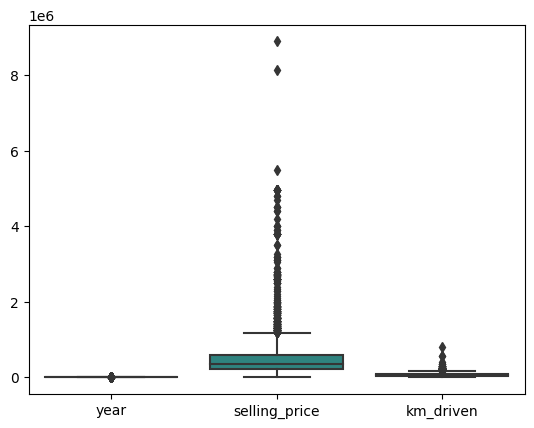

In [117]:
# Plotting BoxPlot for checking for outliers
sns.boxplot(car,palette='viridis')

From this Plot we can see that Selling_price column has so many outliers.So, we will remove these outliers.

<Axes: >

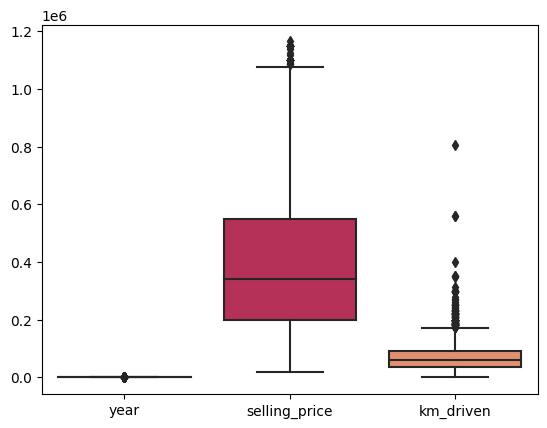

In [118]:
# Removing Outliers

column = car['selling_price']
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
car['selling_price'] = column[(column > lower_bound) & (column < upper_bound)]

sns.boxplot(car,palette='rocket')

 # Handling Duplicate Values

In [119]:
# checking for duplicate values
car.duplicated().sum()

766

In [120]:
# Dropping the duplicate values
car.drop_duplicates(inplace=True)
car.shape

(3574, 8)

Observation :

After dropping duplicate values there are only 3574 rows are left in the dataset
with 8 columns.

 # Handling Missing Values

In [121]:
# checking the null values
car.isnull().sum()

name               0
year               0
selling_price    186
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

Observation :

As there are there are very less no. of null values in the dataset so we will drop these null values.

In [122]:
# Dropping the null values
car.dropna(inplace=True)

# checking for null values
car['selling_price'].isnull().any()

False

# Checking for Unique values

In [123]:
# checking for unique values
car.nunique()

name             1381
year               27
selling_price     358
km_driven         732
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [124]:
# checking for unique values of  name column
car['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [125]:
# checking for unique values of  year column
car['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2013, 2018, 2011, 2010, 2009,
       2019, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

In [126]:
# checking for unique values of selling_price column
car['selling_price'].unique()

array([  60000.,  135000.,  600000.,  250000.,  450000.,  140000.,
        550000.,  240000.,  850000.,  365000.,  260000.,  585000.,
        390000.,  975000.,  930000.,  525000.,  900000.,  229999.,
        625000., 1050000.,  560000.,  290000.,  275000.,  411000.,
        150000.,  500000.,  100000.,  725000.,  401000.,  750000.,
        310000.,  665000.,  465000.,  160000.,  675000.,  300000.,
         70000.,  151000.,  280000.,  350000.,  570000.,  125000.,
        130000.,  925000.,  200000.,  248000.,   80000.,  650000.,
        495000.,  371000., 1025000.,  325000.,  210000., 1150000.,
        175000.,  628000.,  399000.,  315000.,  780000.,  434000.,
        690000.,  555000.,  120000.,  165000.,   95000.,  800000.,
        840000.,  490000.,  400000., 1000000.,  530000.,   40000.,
         75000.,  540000.,  700000.,  430000.,   65000.,  195000.,
        170000.,  225000.,   99000.,  620000.,  320000.,  810000.,
        282000.,   72000.,  640000.,  380000.,  434999.,  1900

In [127]:
# checking for unique values of km_driven column
car['km_driven'].unique()

array([ 70000,  50000, 100000,  46000, 141000, 125000,  25000,  60000,
        78000,  35000,  24000,  33000,   4500,  14500,  15000, 130400,
       119000,  40000,  74000,  64000, 120000,  79000,  80000,  18500,
        10200,  29000,  28000,  90000,  73300,  92000,  66764, 350000,
       230000,  31000,  39000, 166000, 110000,  54000,  63000,  76000,
        11958,  20000,   9000,  58000,  62200,  53000,  63500,  29173,
        30000,  87000,  16000,  79350,  81000,   3600,  14272,  49213,
        57000,   3240,   5000,  10000, 114000,  53772, 140000, 175000,
        36000, 155500,  23000,  22155,  78380, 150000,  80362,  55000,
         1136,  43000,   2650, 115962,  65000,  56000, 213000, 139000,
       160000, 163000,  32000,  52000,  11240,  66000,  49000,  26500,
        72000,  44000, 130000, 195000, 155000,   4000,  41000,  10832,
        14681,  51000, 200000,  19600,  46730,  21170, 212814,  88635,
       149674,   8000,  68000,  38000,  75000,  98000,  81925,  82080,
      

In [128]:
# checking for unique values of fuel column
car['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [129]:
# checking for unique values of seller_type column
car['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [130]:
# checking for unique values of transmission column
car['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [131]:
# checking for unique values of owner column
car['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

# Feature Engineering

In [132]:
# creating a brand column using the name of the car
car['brand'] = car['name'].apply(lambda x:x.split()[0])

In [133]:
# checking the unique values of the brand and showing the first 5 rows of brand column
print(car['brand'].nunique())
print(car['brand'].unique())
print(car['brand'].head())

22
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Skoda' 'Toyota'
 'Mercedes-Benz' 'Mahindra' 'Ford' 'Nissan' 'Renault' 'Fiat' 'Volkswagen'
 'Audi' 'Mitsubishi' 'Daewoo' 'Force' 'OpelCorsa' 'BMW' 'Ambassador']
0     Maruti
1     Maruti
2    Hyundai
3     Datsun
4      Honda
Name: brand, dtype: object


In [134]:
# Saving this updated dataset for visualization by converting into new csv file
car.to_csv('car_updated.csv')

# Visualizing Target Feature

It is clear that the target feature is 'selling_price' which is the price of the car.

In [135]:
car['selling_price']

0        60000.0
1       135000.0
2       600000.0
3       250000.0
4       450000.0
          ...   
4335    409999.0
4336    409999.0
4337    110000.0
4338    865000.0
4339    225000.0
Name: selling_price, Length: 3388, dtype: float64

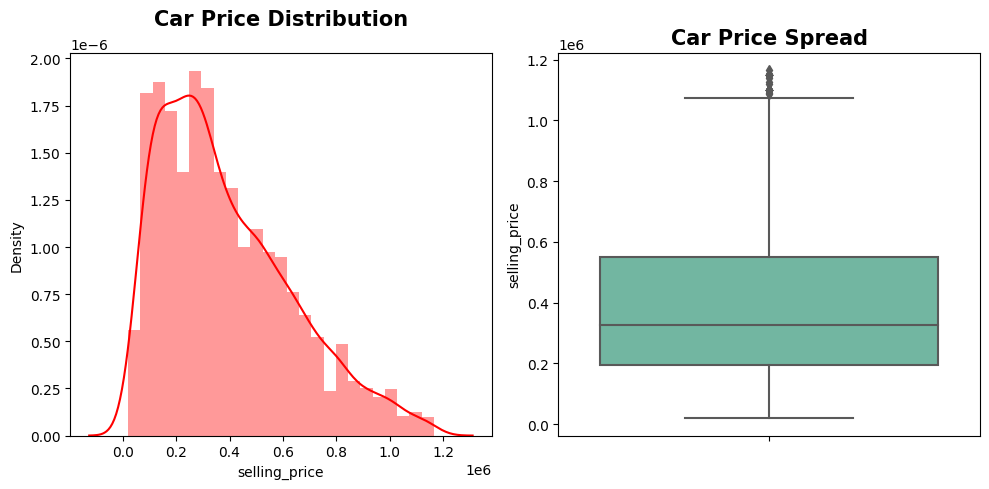

In [136]:
# Showing Car Price Distribution plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(car["selling_price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=15)

# Showing Car Price Spread plot
plt.subplot(1,2,2)
sns.boxplot(y=car["selling_price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",fontsize=15)
plt.tight_layout()
plt.show()

In [137]:
# Graphical Analysis of Car Price
car["selling_price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
selling_price,20000.0,387358.371901,325000.0,1165000.0,246786.158679,0.825563


Insights :

1. We can clearly observe that our Car Price Feature is Slightly Rightly Skewed Distribution.

2. We can clearly observe that there is a significant difference between mean & median value.

3. We can also make an insight that most of the car's price is below 3,25,000.

4. The Majority of the Car falls between 20,000  to  11,65,000.


# Conversion of Categorical Features to Numerical Features.

For this Conversion we will use Label Encoding for converting all the Categorical Features to numerical Features.

# Label Encoding

In [138]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['fuel','seller_type','transmission','owner']
for col in columns:
  car[col] = le.fit_transform(car[col])

car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000.0,70000,4,1,1,0,Maruti
1,Maruti Wagon R LXI Minor,2007,135000.0,50000,4,1,1,0,Maruti
2,Hyundai Verna 1.6 SX,2012,600000.0,100000,1,1,1,0,Hyundai
3,Datsun RediGO T Option,2017,250000.0,46000,4,1,1,0,Datsun
4,Honda Amaze VX i-DTEC,2014,450000.0,141000,1,1,1,2,Honda


# Selecting independent and the dependent features from the dataset

In [139]:
x = car.drop(['selling_price','name','brand'],axis=1) # x denotes independent features
y = car['selling_price']                              # y denotes dependent variable
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3388, 6)
(3388,)


# Train Test Split

Dividing the data into training and testing data

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
print(3388*0.25)

847.0


In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2541, 6)
(847, 6)
(2541,)
(847,)


# Creating functions to evaluate the Regression Evaluation Metrics, Model Score.

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [144]:
def reg_eval_metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)

def mscore(model):
    print('Training Score',model.score(x_train,y_train)) # Trainng R2 score
    print('Testing Score',model.score(x_test,y_test))    # Testing R2 Score




# Importing the ML Regression libraries

In [145]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor


# 1. Linear Regression

In [146]:
# Building the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

# Computing Training and Testing score
mscore(lin_reg)

# Generating Prediction
ypred_lr = lin_reg.predict(x_test)
print(ypred_lr)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_lr)

# Evaluating Model : R2 score
r2_lr = r2_score(y_test,ypred_lr)*100
r2_lr

Training Score 0.48143171753346525
Testing Score 0.5624937312230587
[ -95954.5176743   304117.5410843   463388.54414329  481611.5788525
   96977.88869132   49012.83739578  393580.5140717   120256.61036696
  204188.30195372  441126.66399296  199458.61549956  119905.17571853
  401403.55797189  217154.83039686  397019.39337333   55731.16499333
  479931.99695312  262041.28701247   -5703.63421503  443174.09831496
  275741.33146056  218607.58254418  414078.40432853  239113.99998526
  162332.86443879  291184.39471956  398788.95135141   67576.48097614
  481063.41290992  630876.39193401  363341.04879843  233812.06232576
  590391.47707447  388621.48387638  317729.14555363  452374.60502617
  471124.69253542  594086.55725312  153760.00566762  390726.95823435
  713278.19562357  322431.97487192  173082.18859487  486026.14240575
  406089.21208315  447173.15883076  215424.9041196   185847.01103021
  285219.5829879   299577.41226324  312778.64254257  642804.92063855
  369053.36064795  -76223.69394863  

56.24937312230587

# 2. Ridge Regression

In [147]:
# Building the Ridge Regression Model
ridge = Ridge(alpha=10)
ridge.fit(x_train,y_train)

# Computing Training and Testing score
mscore(ridge)

# Generating Prediction
ypred_ridge = ridge.predict(x_test)
print(ypred_ridge)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_ridge)

# Evaluating Model : R2 score
r2_ridge = r2_score(y_test,ypred_ridge)*100
r2_ridge

Training Score 0.4812983644258001
Testing Score 0.5614928985578018
[ -95585.12994806  305256.19054745  464642.14009295  482873.35304341
   96986.78593676   49887.11990477  394719.33619223  120946.73216467
  204254.99076417  442312.55604882  200422.22877602  120899.65636655
  401551.25640667  217069.1486044   398296.25187022   56626.49158971
  481188.51012218  262971.80508821   -5115.24367791  443530.99842535
  275902.73349873  218793.74380548  415230.50242411  239058.93465843
  163231.1176239   292284.56105646  399106.65497542   68381.64649495
  481200.45253557  631437.29500435  364436.08101717  233918.58455319
  590876.49800976  389872.03726404  318859.50080227  452809.22675565
  471569.1434148   594583.15243648  154682.33613279  391019.40895349
  713656.80568683  323577.06098173  174014.11231981  486337.04678097
  407167.3828086   448377.99056527  215346.56687619  186818.9185212
  286011.42530097  299915.33779466  313766.22649515  631512.83736756
  369328.85267673  -75665.23793408  3

56.14928985578018

# 3. Lasso Regression

In [148]:
# Building the Lasso Regression Model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

# Computing Training and Testing score
mscore(lasso)

# Generating Prediction
ypred_lasso = lasso.predict(x_test)
print(ypred_lasso)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_lasso)

# Evaluating Model : R2 score
r2_lasso = r2_score(y_test,ypred_lasso)*100
r2_lasso

Training Score 0.4814317175292637
Testing Score 0.5624935012027064
[ -95954.45649461  304117.89965998  463389.39397325  481611.90882069
   96977.98990645   49013.17743824  393580.80982295  120256.76527843
  204187.84619234  441126.96823137  199458.91848007  119905.55426405
  401403.56328572  217154.79303201  397019.79242826   55731.51367345
  479932.32476189  262041.51893005   -5703.47336264  443173.71292411
  275741.45194025  218607.73485241  414078.70011249  239113.95457245
  162333.14600836  291184.21969752  398789.07850721   67576.74600329
  481062.97606777  630876.5343512   363341.33199234  233812.13529984
  590391.59376188  388621.87213422  317729.49530842  452374.77475521
  471124.3430803   594086.67869125  153760.30253634  390727.07502494
  713278.29117627  322432.33067307  173082.48398472  486026.20387545
  406088.95430461  447173.47084308  215424.85457118  185847.32283163
  285219.84342275  299577.61603104  312778.8870502   642802.8068323
  369053.47589424  -76223.5085189   3

56.249350120270634

# 4. Random Forest Regression

In [149]:
# Building the RandomForest Regression Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

# Computing Training and Testing score
mscore(rf)

# Generating Prediction
ypred_rf = rf.predict(x_test)
print(ypred_rf)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_rf)

# Evaluating Model : R2 score
r2_rf = r2_score(y_test,ypred_rf)*100
r2_rf

Training Score 0.8191612121869217
Testing Score 0.5694409737952779
[ 71471.66666667 308280.36314286 553649.69558902 425057.81385281
 142917.485      110612.85714286 325775.83333333  91236.
 235869.98       402876.98190476 243140.40417249 146318.696
 465589.49666667 174249.87333333 389641.32083333 146872.5
 338919.66089466 196355.83333333  78195.         316400.
 386750.         208896.65666667 359433.62987013  75612.5
 174128.11169048 263640.48606061 292856.18019048  83500.
 256459.56190476 933169.90620491 394427.60904762 335810.
 637129.9533103  261666.53761905 231500.         365500.
 544590.         785117.57527579 101615.         304758.46681097
 544020.         484000.         195986.63933333 451169.92090224
 297240.         466932.24219048 170299.94       190500.
 117026.06457143 196813.33333333 320752.5        627509.97
 283222.69928571  58473.         292856.18019048 254922.38095238
  66256.66666667 421954.62283867 229749.96       293313.70647367
  72929.94       494162.0452619

56.94409737952779

# 5. K-Nearest Neighbors Regression

In [150]:
# Building the KNeighbors Regression Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

# Computing Training and Testing score
mscore(knn)

# Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_knn)

# Evaluating Model : R2 score
r2_knn = r2_score(y_test,ypred_knn)*100
r2_knn

Training Score 0.5368869730892292
Testing Score 0.3416441316777311
[ 74000.  211999.8 487000.  415000.  152000.   97000.  357800.  118000.
 449200.  352800.  274000.  258999.8 547999.8 327999.8 381999.8 141000.
 330000.  257000.   69700.  231000.  206000.  165000.  300000.   82000.
 180000.  324000.  250800.  358000.  145999.8 929000.  420200.  236000.
 639999.8 271000.  276799.8 367000.  387799.8 399000.   57000.  231000.
 864000.  302000.  390000.  409000.  450000.  602999.8  98200.  187000.
 161000.  185000.  281000.  516799.8 270000.  447000.  317000.  288000.
  64700.  563000.  295000.  324000.   81000.  454999.8 449200.  530000.
 510000.  399000.  720000.  519000.  470000.  542600.  527000.  328000.
 280200.  188999.8 257000.  225600.  264000.  542000.  390000.  422999.8
 510000.  403399.8 336000.  587599.8 754200.  164000.  365000.   88400.
 281000.  415000.  353000.  260000.  555400.  220000.  374000.  248000.
 150999.8 552000.  710000.  320000.  292999.8 776999.8 307000.  2070

34.16441316777311

# 6. Decision Tree Regression

In [151]:
# Building the DecisionTree Regression Model
dt = DecisionTreeRegressor(criterion='absolute_error')
dt.fit(x_train,y_train)

# Computing Training and Testing score
mscore(dt)

# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_dt)

# Evaluating Model : R2 score
r2_dt = r2_score(y_test,ypred_dt)*100
r2_dt

Training Score 0.8478519307103716
Testing Score 0.3896208210954094
[  70000.   350000.   315000.   430000.    50000.   135000.   295000.
   80000.    55000.   399500.   180000.   147499.5  300000.    55000.
  375000.   130000.   300000.   192500.    50000.   210000.   150000.
  100000.   245000.    55000.   150000.   235000.   185000.   100000.
  229999.   930000.   371000.   500000.   740000.   270000.   190000.
  300000.   750000.  1025000.    75000.   190000.   520000.   650000.
  220000.   404999.5  525000.   600000.   300000.   200000.   102500.
  195000.   317500.   440000.   320000.    43000.   185000.   250000.
   50000.   305000.   280000.   200000.   409999.   472499.5  420000.
  650000.   325000.   240000.   900000.   550000.   550000.   630000.
  900000.   370000.   240000.   202499.5  250000.   170000.   350000.
  409999.   350000.  1000000.   925000.    85000.   180000.   535000.
 1030000.   150000.   280000.   155000.   317500.   430000.   325000.
  220000.   281000.   1

38.962082109540944

# 7. Gradient Boosting Regression

In [152]:
# Building the DecisionTree Regression Model
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

# Computing Training and Testing score
mscore(gbr)

# Generating Prediction
ypred_gbr = gbr.predict(x_test)
print(ypred_gbr)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_gbr)

# Evaluating Model : R2 score
r2_gbr = r2_score(y_test,ypred_gbr)*100
r2_gbr

Training Score 0.6119735832565347
Testing Score 0.6287842557657759
[ 82083.83587042 274625.28328515 738235.47063388 458834.33360688
 178034.52549745  89320.74425798 345753.35662754 141029.69585236
 258649.90133744 412338.53699233 189569.93342774 121213.63637118
 376306.42349787 257453.26167405 368708.49627973  91763.82472027
 458834.33360688 204811.85062463  67532.45652941 425698.19429813
 320559.89597604 232109.22937986 375634.7530653  209571.57806631
 156002.24623458 284108.52442925 354138.93241744  94670.93174642
 245381.60774943 779026.07782511 331458.86629097 218703.5253156
 660752.97880706 368708.49627973 320230.7208332  388165.66941832
 421268.54071433 670469.96484645 135367.79002627 339151.65220809
 565485.33871835 326642.62884259 154220.74292618 503662.37951828
 464840.81973242 414534.09145593 197594.1185264  158751.43172296
 199995.61317625 240825.94801927 279441.52073353 557703.96404831
 292650.14948805  98771.06333354 350920.00600227 331458.86629097
  81858.85680726 458834.

62.87842557657759

# 8. AdaBoost Regression

In [153]:
# Building the AdaBoost Regression Model
adab = AdaBoostRegressor()
adab.fit(x_train,y_train)

# Computing Training and Testing score
mscore(adab)

# Generating Prediction
ypred_adab = adab.predict(x_test)
print(ypred_adab)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_adab)

# Evaluating Model : R2 score
r2_adab = r2_score(y_test,ypred_adab)*100
r2_adab

Training Score 0.4331432258071872
Testing Score 0.4842842570243584
[173227.50089445 338884.89465154 559000.         545362.06963788
 240772.63636364 178013.13157895 486118.44741235 201983.76363636
 286282.63829787 486118.44741235 257522.42906574 189333.38495575
 559614.26527051 286282.63829787 426790.20236337 178013.13157895
 545362.06963788 338884.89465154 173227.50089445 497315.16766021
 497315.16766021 240772.63636364 426790.20236337 286282.63829787
 208247.72752809 338884.89465154 464033.68960674 173227.50089445
 464033.68960674 689530.67877095 486118.44741235 256336.92753623
 679586.74347158 426790.20236337 401332.44166667 464033.68960674
 464033.68960674 679586.74347158 189333.38495575 497315.16766021
 689530.67877095 401332.44166667 208247.72752809 559614.26527051
 486118.44741235 486118.44741235 286282.63829787 208247.72752809
 338884.89465154 397326.56397306 338884.89465154 545362.06963788
 397326.56397306 173227.50089445 464033.68960674 401332.44166667
 173227.50089445 545362

48.42842570243584

# 9. XGBoost Regression

In [154]:
# Building the XGBoost Regression Model
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

# Computing Training and Testing score
mscore(xgb)

# Generating Prediction
ypred_xgb = xgb.predict(x_test)
print(ypred_xgb)

# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_xgb)

# Evaluating Model : R2 score
r2_xgb = r2_score(y_test,ypred_xgb)*100
r2_xgb

Training Score 0.7815275468861764
Testing Score 0.5830988600317711
[  46758.68   265991.72   773703.8    416753.     122981.59    80783.72
  307967.6     79128.67   189807.98   411578.47   207418.2    158949.75
  425681.56   201893.73   322197.2    114538.375  348716.6    219686.38
   58298.42   314668.06    96399.28   209267.95   358568.3    133048.69
  184560.4    294181.22   315506.75   110774.74   116100.31   844270.25
  470106.22   199342.94   667198.44   280863.5    268412.25   364914.88
  430679.88   692323.7    104855.695  253377.83   532410.2    380244.75
  155345.73   519270.3    437310.34   446281.3    177822.67   170773.61
  183697.06   177955.47   298434.62   542896.56   299824.53    66468.72
  372689.72   332369.16    73335.05   426008.34   197882.81   482398.34
   35509.516  499691.84   338928.16   622482.6    313054.94   283119.1
  888314.9    476197.66   519469.16   929651.2    734977.56   329102.8
  249008.05   182724.19   274565.25   239305.62   276897.16   334737.4


58.30988600317711

# Comparing Different Regression Models

Creating a dataframe showing R2_score of each model

In [155]:
# Creating a dataframe showing R2_score of each model
models = pd.DataFrame({
    'Model': ['Linear Regression','Ridge Regression','Lasso Regression','RandomForest Regressor','KNeighbors Regressor','DecisionTree Regressor','GradientBoosting Regressor','AdaBoost Regressor','XGBoost Regressor'],
    'Score': [r2_lr,r2_ridge,r2_lasso,r2_rf,r2_knn,r2_dt,r2_gbr,r2_adab,r2_xgb]})

models.sort_values(by='Score',ascending=False)

,Model,Score
6,GradientBoosting Regressor,62.878426
8,XGBoost Regressor,58.309886
3,RandomForest Regressor,56.944097
0,Linear Regression,56.249373
2,Lasso Regression,56.249350
1,Ridge Regression,56.149290
7,AdaBoost Regressor,48.428426
5,DecisionTree Regressor,38.962082
4,KNeighbors Regressor,34.164413


# Plotting R2_score of each model on a bar graph

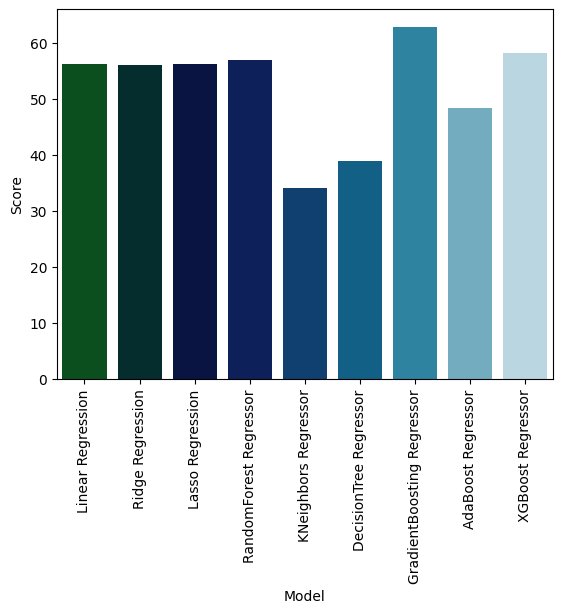

In [156]:
# plotting R2_score of each model on a bar graph
sns.barplot(x=models['Model'],y=models['Score'],palette='ocean')
plt.xticks(rotation=90)
plt.show()

Hence, we can conclude that GradientBoosting Regressor is the best model.

# Generating Predictions on Test data using GradientBoosting Regressor

In [157]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(2541, 6)
(847, 6)
(3388, 6)
(3388,)


## Final model (GradientBoosting Regressor) based on Evaluation from models dataframe

In [158]:
best_model = GradientBoostingRegressor(n_estimators=80)
best_model.fit(x,y)

GradientBoostingRegressor(n_estimators=80)

## Generating Prediction on test data

In [159]:
ypred = best_model.predict(x_test)
print(ypred)

[ 91520.01159206 272867.52955409 735551.39618985 471517.51196886
 167418.60817516  87446.8557402  342767.61883005 122597.93489165
 294514.29078242 424625.85934822 180858.3456418  118467.01365743
 362860.99948013 269222.2985657  374364.75437025  87446.8557402
 471517.51196886 209689.81802553  87134.62651782 466596.82994587
 350868.88387285 235646.48319924 386946.46149684 210961.71252007
 160279.19400052 285058.11161562 352287.82474611  94734.90023022
 250547.1969281  779781.22734198 314199.73581451 215316.25457932
 672809.67765441 379032.57287526 309006.51501157 388404.39751934
 438827.57703967 672809.67765441 130894.50243601 364958.88907997
 534865.26855731 309006.51501157 160279.19400052 487417.4051145
 464891.62120214 425584.60699919 197031.64804516 159554.65147183
 204496.5972226  241313.49306083 281769.82121108 600492.27293887
 292374.37151354  88472.55100757 347629.16789435 314199.73581451
  88472.55100757 471517.51196886 296751.68157828 487417.4051145
  78527.25242268 480358.7124

# Save the Model

In [160]:
import pickle

In [161]:
pickle.dump(best_model, open('model.pkl', 'wb')) # wb = write binary
pickle.dump(car, open('dataset.pkl', 'wb')) # wb = write binary

# Load the Model

In [162]:
loaded_model = pickle.load(open('model.pkl', 'rb'))  # rb = read binary
loaded_model.predict(x_test)

array([ 91520.01159206, 272867.52955409, 735551.39618985, 471517.51196886,
       167418.60817516,  87446.8557402 , 342767.61883005, 122597.93489165,
       294514.29078242, 424625.85934822, 180858.3456418 , 118467.01365743,
       362860.99948013, 269222.2985657 , 374364.75437025,  87446.8557402 ,
       471517.51196886, 209689.81802553,  87134.62651782, 466596.82994587,
       350868.88387285, 235646.48319924, 386946.46149684, 210961.71252007,
       160279.19400052, 285058.11161562, 352287.82474611,  94734.90023022,
       250547.1969281 , 779781.22734198, 314199.73581451, 215316.25457932,
       672809.67765441, 379032.57287526, 309006.51501157, 388404.39751934,
       438827.57703967, 672809.67765441, 130894.50243601, 364958.88907997,
       534865.26855731, 309006.51501157, 160279.19400052, 487417.4051145 ,
       464891.62120214, 425584.60699919, 197031.64804516, 159554.65147183,
       204496.5972226 , 241313.49306083, 281769.82121108, 600492.27293887,
       292374.37151354,  

# Creating a Random Dataset and Applying the saved model to predict the target column for the new dataframe.

Taking sample of Random 20 Points from the CAR_DETAILS Dataset

In [163]:
random = car.sample(20)
random_df = random.drop('selling_price',axis=1)
random_df

,name,year,km_driven,fuel,seller_type,transmission,owner,brand
3576,Honda City 1.3 DX,2003,165000,4,1,1,2,Honda
3226,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2005,120000,1,1,1,2,Toyota
2647,Maruti Swift VDI BSIV,2015,60000,1,1,1,2,Maruti
685,Maruti Wagon R LX Minor,2013,38000,4,1,1,0,Maruti
1168,Maruti Wagon R VXI BSIII,2004,80000,4,1,1,2,Maruti
2282,Tata Tigor 1.2 Revotron XM,2019,10000,4,1,1,0,Tata
3726,Maruti Alto 800 LXI,2014,61000,4,1,1,0,Maruti
891,Mahindra Bolero 2011-2019 SLX,2013,107000,1,1,1,0,Mahindra
3056,Maruti Swift 1.3 VXi,2010,50000,4,1,1,0,Maruti
985,Hyundai Creta 1.6 CRDi SX Option,2015,60000,1,1,1,0,Hyundai


In [164]:
# Conversion of random_df to csv file.
random_df.to_csv('data_sample')

In [165]:
# Loading car_sample dataset
sample_data = pd.read_csv('data_sample')
sample_data

,Unnamed: 0,name,year,km_driven,fuel,seller_type,transmission,owner,brand
0,3576,Honda City 1.3 DX,2003,165000,4,1,1,2,Honda
1,3226,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2005,120000,1,1,1,2,Toyota
2,2647,Maruti Swift VDI BSIV,2015,60000,1,1,1,2,Maruti
3,685,Maruti Wagon R LX Minor,2013,38000,4,1,1,0,Maruti
4,1168,Maruti Wagon R VXI BSIII,2004,80000,4,1,1,2,Maruti
5,2282,Tata Tigor 1.2 Revotron XM,2019,10000,4,1,1,0,Tata
6,3726,Maruti Alto 800 LXI,2014,61000,4,1,1,0,Maruti
7,891,Mahindra Bolero 2011-2019 SLX,2013,107000,1,1,1,0,Mahindra
8,3056,Maruti Swift 1.3 VXi,2010,50000,4,1,1,0,Maruti
9,985,Hyundai Creta 1.6 CRDi SX Option,2015,60000,1,1,1,0,Hyundai


In [166]:
# showing first 5 rows
sample_data.head()

,Unnamed: 0,name,year,km_driven,fuel,seller_type,transmission,owner,brand
0,3576,Honda City 1.3 DX,2003,165000,4,1,1,2,Honda
1,3226,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2005,120000,1,1,1,2,Toyota
2,2647,Maruti Swift VDI BSIV,2015,60000,1,1,1,2,Maruti
3,685,Maruti Wagon R LX Minor,2013,38000,4,1,1,0,Maruti
4,1168,Maruti Wagon R VXI BSIII,2004,80000,4,1,1,2,Maruti


In [167]:
# showing last 5 rows
sample_data.tail()

,Unnamed: 0,name,year,km_driven,fuel,seller_type,transmission,owner,brand
15,3658,Renault Duster 85PS Diesel RxL Optional,2013,75000,1,1,1,2,Renault
16,525,Maruti SX4 S Cross DDiS 320 Delta,2016,560000,1,0,1,0,Maruti
17,524,Maruti Wagon R LXI Minor,2007,49000,4,0,1,0,Maruti
18,807,Mahindra Bolero Power Plus SLX,2017,50000,1,1,1,2,Mahindra
19,3529,Ford Ecosport 1.5 DV5 MT Titanium,2015,146000,1,0,1,0,Ford


In [168]:
# showing dimension of the dataset
sample_data.shape

(20, 9)

In [169]:
# showing columns
sample_data.columns

Index(['Unnamed: 0', 'name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand'],
      dtype='object')

In [170]:
# Dropping unnecessary columns
sample_data = sample_data.drop(['Unnamed: 0','name','brand'],axis=1)
sample_data.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [171]:
# making prediction on sample data
predicted_selling_price = loaded_model.predict(sample_data)
print(predicted_selling_price)

[107694.60885785 193444.59963991 507593.48147454 282728.56886205
  89726.43263344 553982.67408354 313240.98816354 400130.90871388
 186051.56644473 517372.8419827  695229.68943781 209689.81802553
 400439.81025084 186051.56644473 672809.67765441 393072.21602435
 687601.4690946  161396.14078418 657403.75099026 565727.35992522]


In [172]:
#  Compare the actual data and predicted data
new_data_with_predictions = random.copy()
new_data_with_predictions["predicted_selling Price"] = predicted_selling_price

# Print the actual and predicted data
print("Actual Selling Price and Predicted Selling Price for 20 cars brands with their name are :- ")
new_data_with_predictions[["name","brand","selling_price", "predicted_selling Price"]]

Actual Selling Price and Predicted Selling Price for 20 cars brands with their name are :- 


,name,brand,selling_price,predicted_selling Price
3576,Honda City 1.3 DX,Honda,120000.0,107694.608858
3226,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Toyota,310000.0,193444.599640
2647,Maruti Swift VDI BSIV,Maruti,350000.0,507593.481475
685,Maruti Wagon R LX Minor,Maruti,250000.0,282728.568862
1168,Maruti Wagon R VXI BSIII,Maruti,155000.0,89726.432633
2282,Tata Tigor 1.2 Revotron XM,Tata,500000.0,553982.674084
3726,Maruti Alto 800 LXI,Maruti,180000.0,313240.988164
891,Mahindra Bolero 2011-2019 SLX,Mahindra,400000.0,400130.908714
3056,Maruti Swift 1.3 VXi,Maruti,260000.0,186051.566445
985,Hyundai Creta 1.6 CRDi SX Option,Hyundai,950000.0,517372.841983
